In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
import random
import copy 
import math

In [2]:
d_train = pd.read_csv("Kmean_dataset.csv")

In [3]:
X = d_train.to_numpy()

In [4]:
X_scaled = ((X - X.min()) / (X.max() - X.min())) * 10 + 1

In [5]:
def centroids_cal(x, k):
    centroid = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size = (k, x.shape[1]))
    return centroid

In [6]:
def euclidean_dist(x, centroids):
    dist = np.sqrt(np.sum((centroids - x)**2, axis=1))
    return dist

In [7]:
def silhouette_coefficient(X, labels, num_clusters):
    silhouette_values = []

    for i in range(num_clusters):
        cluster_points = X[labels == i]
        num_cluster_points = len(cluster_points)
        a_values = np.zeros(num_cluster_points)
        b_values = np.zeros(num_cluster_points)
        other_clusters = [k for k in range(num_clusters) if k != i]

        for j in range(num_cluster_points):
            a_values[j] = np.mean([np.linalg.norm(cluster_points[j] - point) for point in cluster_points])
            b_values[j] = np.min([np.mean([np.linalg.norm(cluster_points[j] - point) for point in X[labels == k]]) for k in other_clusters])
            
        # Calculate the silhouette coefficient for each point in the cluster
        s_values = (b_values - a_values) / np.maximum(a_values, b_values)
        silhouette_values.extend(s_values)

    return np.mean(silhouette_values)

In [8]:
def labels(x, max_iterations, k):
    centroid = centroids_cal(x, k)
    for _ in range(max_iterations):
        y = []
        for data_point in range(len(x)):
            distances = euclidean_dist(x[data_point], centroid)
            cluster_num  = np.argmin(distances)
            y.append(cluster_num)
        
        y = np.array(y)
        cluster_indices = []
        for i in range(k):
            cluster_indices.append(np.argwhere(y == i))

        cluster_centers = []

        for i,indices in enumerate(cluster_indices):
            if len(indices) == 0:
                cluster_centers.append(centroid[i])
            else:
                cluster_centers.append(np.mean(x[indices], axis=0)[0])

        if np.max(centroid - np.array(cluster_centers)) < 0.0001:
            break
        else:
            centroid = np.array(cluster_centers)

    silk = silhouette_coefficient(X, y, k)

    sse = 0
    for i in range(len(x)):
        sse += np.sum((x[i] - centroid[y[i]])**2)

    return y, silk, sse

In [9]:
labels_list = []
silks = []
sse_list = []
for i in range(2,11):
    l, silk, sse = labels(X_scaled, 200, i)
    silks.append(silk)
    labels_list.append(l)
    sse_list.append(sse)
    

c:\Users\mahim\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mahim\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


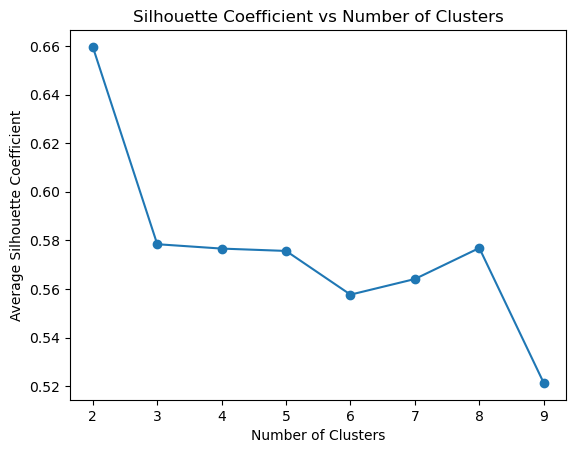

In [10]:
plt.plot(range(2, 11), silks, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Coefficient')
plt.title('Silhouette Coefficient vs Number of Clusters')
plt.show()

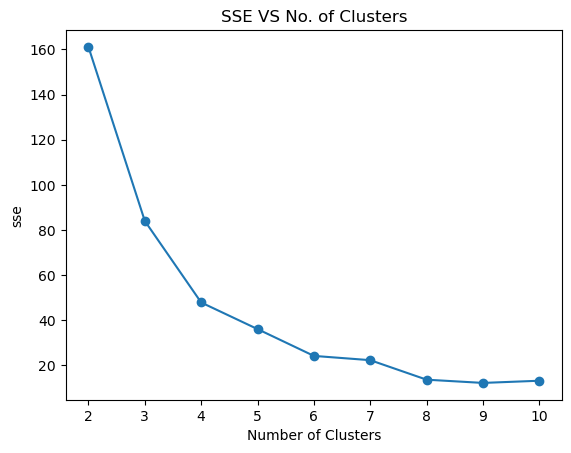

In [11]:
plt.plot(range(2, 11), sse_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('sse')
plt.title('SSE VS No. of Clusters')
plt.show()